# Classification

## Part 1: Logistic Regression Walkthrough
Logistic Regression is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome. The outcome is measured with a dichotomous variable (where there are only two possible outcomes). It is used for binary classification tasks.

Implementing a Logistic Regression to predict whether a patient has a particular disease based on certain diagnostic measurements using a breast cancer dataset available through `sklearn.datasets` .

### Step 1: Import Necessary Libraries

In [47]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Load & Split the Dataset

In [48]:
# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

*test_size* represents the proportion of the dataset in the test split from the original dataset. The percentage of the test size will change according to the number set as the test_size. In the above code, 0.2 means 20% of the original dataset will be used for the test set. If the value is changed to 0.3, it means that 30% of the original dataset will be used as a test set. Modifying this number can change the accuracy and performance of a model.

The *random_state* parameter controls the shuffling applied to the data prior split. If the random_state is *None*, different train/test splits will be generated each time we run train_test_split. However, if random_state is set to an integer, the split datasets will be the same every time we run the function train_test_split.

### Step 3: EDA

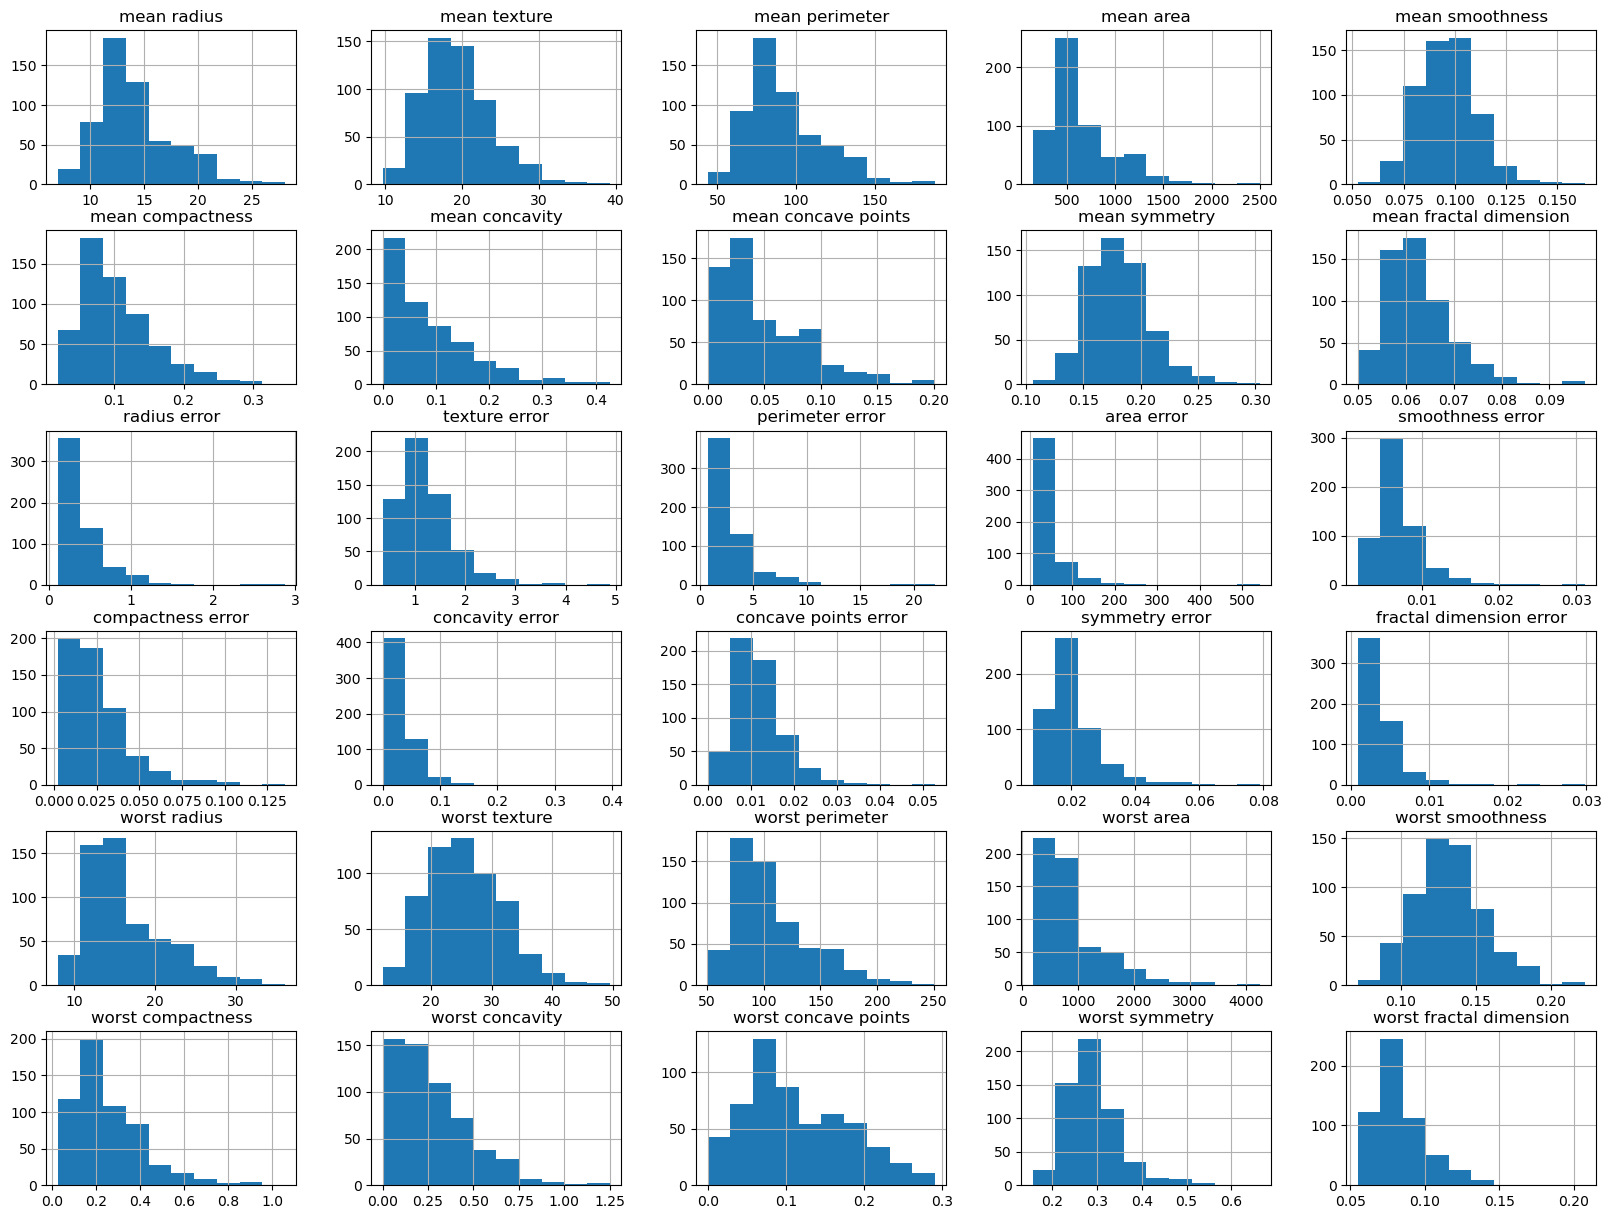

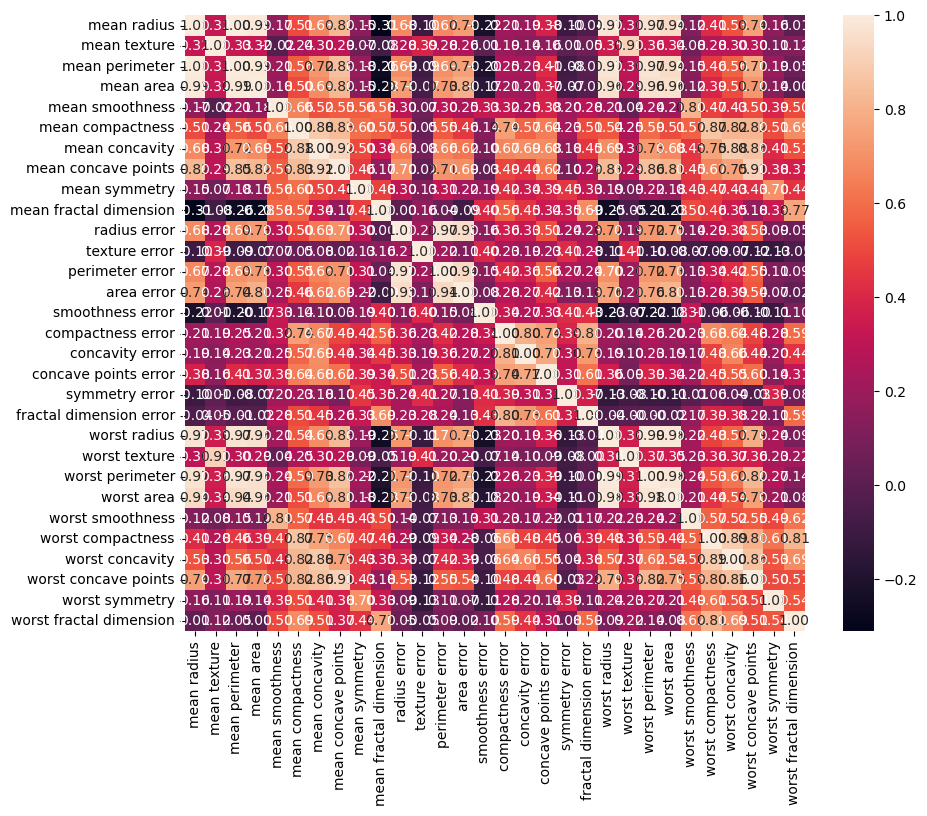

In [49]:
X_df = pd.DataFrame(X, columns=data.feature_names)

# Histograms
X_df.hist(bins=10, figsize=(20,15))
plt.show()

# Correlation matrix
corr_matrix = X_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

*EDA* can give away visual clues that one cannot see from the raw data. It helps in identifying patterns, anomalies, relationships and correlations between variables. The insights gained from an EDA can help practitioners with better model selection and feature engineering.

### Step 4: Model Training

In [50]:
# Train a Logistic Regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

The *max_iter* parameter is the maximum number of iterations taken for the solvers to converge.

Yes, LogisticRegression accepts other parameters:
* penalty: specify the norm used in the penalization (None/l1/l2/elasticnet)
* dual: specify dual formation
* tol: tolerance for stopping criteria
* C: inverse of regularization strength. Smaller values specify stronger regularization
* fit_intercept: specify if a constant should be added to the decision function
* intercept_scaling: useful when the solver 'liblinear' is used and self.fit_intercet is set to True. 
* class_weight: weights associated with classes in the form `{class_label: weight}`
* random_state: used to shuffle the data when solver == 'sag', 'saga' or 'liblinear'
* solver: algorithm to use in the optimization problem (lbfgs/liblinear/newton-cg/newton-choleskly/sag/saga)
* multi_class: specify how the algorithm handles a multiclass classification problem.
* verbose: specify the verbosity level for the liblinear and lbfgs solvers.
* warm_start: when set set to True, reuse the solution of the previous cal to fit as initialization.
* n_jobs: specify the number of CPU cores used when parallelizing over classes if multi_class='ovr'.
* l1_ratio: Elastic-Net mixing parameter between 0 and 1, only used if penalty is set as elasticnet

#### References
scikit-learn developers (2024) sklearn.linear_model.LogisticRegression https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

### Step 5: Model Evaluation

In [51]:
# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, predictions)}')
print(f'ROC AUC Score: {roc_auc_score(y_test, predictions)}')
print(classification_report(y_test, predictions))

Accuracy: 0.956140350877193
ROC AUC Score: 0.9464461185718965
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



The Receiver Operation Characteristic or ROC plots the rate of true positives against false positives.

The Area Under the Curve or AUC is the area under the ROC curve. It measures the probability that a classifier will rank a positive instance higher than a negative one. An AUC of 1 suggests a model whose predictions is 100% correct. An AUC of 0 suggests a model whose predictions are 100% wrong. In the example above, we have a value closer to 1 which suggest a good prediction model.

#### References
Argawal, R. (2022) ROC Curves & AUC: The Ultimate Guide https://builtin.com/data-science/roc-curves-auc

## Part 2: Implement a KNN Model

K-Nearest Neighbors (KNN) is an instance-based learning algorithm where the class of a sample is determined by the majority class among its K nearest neighbors.
For this part, use the Iris dataset and create a KNN model to classify Iris plants into three species based on the sizes of their petals and sepals.

### Task 1: Implement the KNN Pipeline

### Step 1: Import Necessary Libraries

In [52]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

### Step 2: Load & Split the Dataset

In [53]:
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Spit the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Step 3: EDA

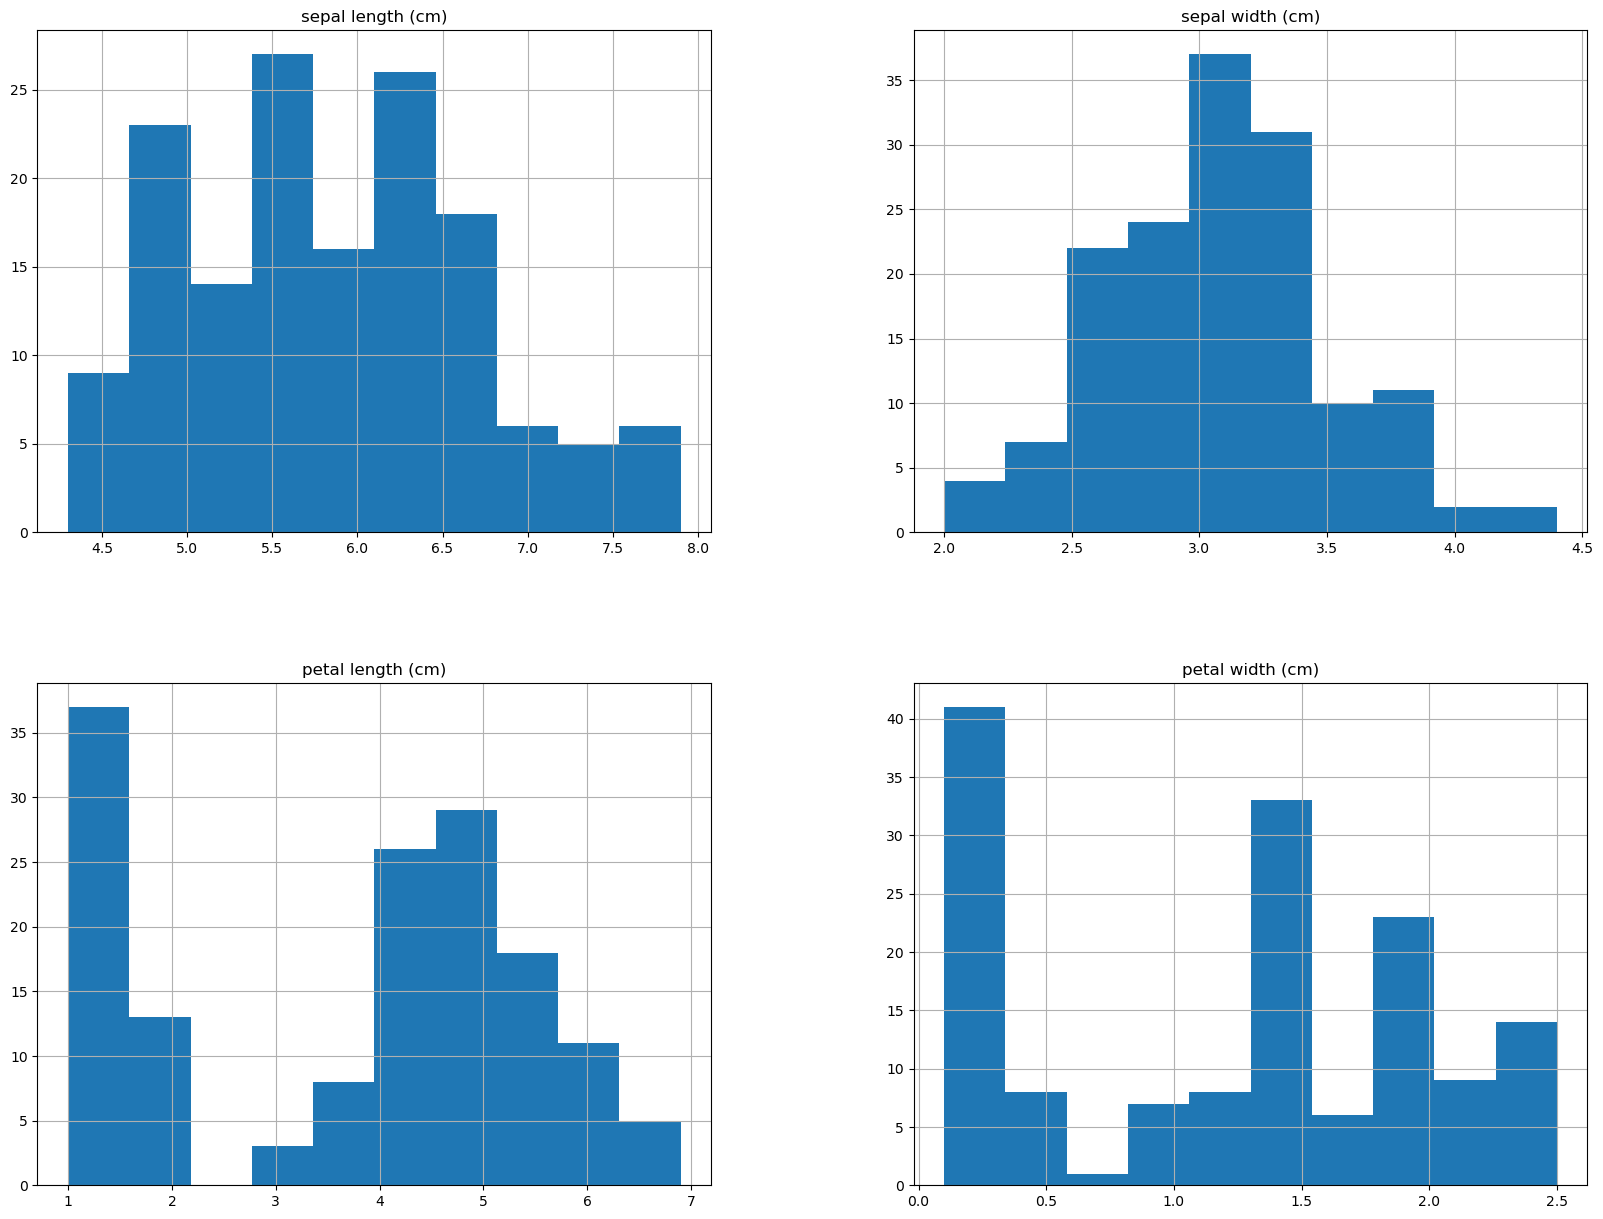

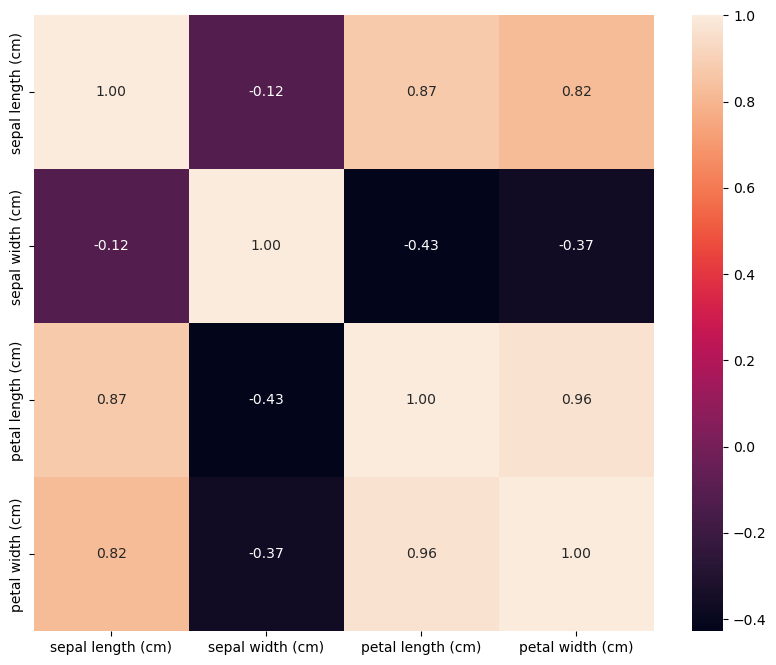

In [54]:
X_df = pd.DataFrame(X, columns=iris.feature_names)

# Histograms
X_df.hist(bins=10, figsize=(20,15))
plt.show()

# Correlation matrix
corr_matrix = X_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

### Step 4: Model Training

In [55]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Step 5: Model Evaluation

In [56]:
predictions = knn.predict(X_test)
accuracy = accuracy_score(y_test, predictions)* 100

print(classification_report(y_test, predictions))
print(f"Accuracy:{accuracy}%" )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

Accuracy:96.66666666666667%


The evaluation metrics show a precision, recall and f1-score close to 1. It also returns an accuracy of 96.66% which suggests that the model fits the data.

### Task 2: Implementation

We have loaded the Iris dataset from sklearn.datasets. We have used histograms to view the distribution of the features of the data. We have also used a correlation matrix to view the correlations between the features. Then, we split the dataset into train (80%) and test (20%) sets, and implemented a KNN model which returned a high accuracy of around 96.66%.